# M11007309 鄭維新 期末報告

# Import module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
plt.style.use('ggplot')
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer


# Read dataset

In [2]:
good_read_book = pd.read_csv('books.csv', error_bad_lines = False)
good_read_book.head()

C:\Users\Wei\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


# Add genre into dataset
Add the web clawer result into the dataset

In [3]:
genre = np.load('genre.npy', allow_pickle = True)
genre = pd.DataFrame(genre)

In [4]:
good_read_book['genre'] = genre
good_read_book.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fantasy


In [29]:
good_read_book

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,genre_to_num
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fantasy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Fiction,9
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Fiction,9
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Historical,10
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Nonfiction,3


In [5]:
unique_genre_data = good_read_book.genre.unique()
unique_genre_data

array(['Fantasy', None, 'Science Fiction', 'Nonfiction', 'Travel',
       'Classics', 'Computer Science', 'Young Adult', 'Romance',
       'Fiction', 'Historical', 'Economics', 'Science', 'Plays', 'Art',
       'Christian', 'Education', 'Parenting', 'Self Help', 'Business',
       'Reference', 'Horror', 'Food and Drink', 'Cultural', 'Politics',
       'Mystery', 'Poetry', 'Language', 'Biography', 'Religion',
       'History', 'Childrens', 'Realistic Fiction', 'Philosophy',
       'Autobiography', 'Pseudoscience', 'Design', 'Music', 'Health',
       'Humor', 'Christianity', 'Sequential Art', 'LGBT',
       'Womens Fiction', 'Leadership', 'Relationships', 'War',
       'Literature', 'Drama', 'Humanities', 'Christian Fiction',
       'Sexuality', 'Psychology', 'Spirituality', 'Sports',
       'Short Stories', 'Neurodiversity', 'Criticism', 'Productivity',
       'Architecture', 'Holiday', 'Writing', 'Adventure', 'Paranormal',
       'Football', 'Novels', 'Games', 'Academic', 'Law',
      

In [6]:
genre_to_num = {}
j = 0
for i in unique_genre_data:
    genre_to_num[i] = j
    j+=1
genre_to_num

{'Fantasy': 0,
 None: 1,
 'Science Fiction': 2,
 'Nonfiction': 3,
 'Travel': 4,
 'Classics': 5,
 'Computer Science': 6,
 'Young Adult': 7,
 'Romance': 8,
 'Fiction': 9,
 'Historical': 10,
 'Economics': 11,
 'Science': 12,
 'Plays': 13,
 'Art': 14,
 'Christian': 15,
 'Education': 16,
 'Parenting': 17,
 'Self Help': 18,
 'Business': 19,
 'Reference': 20,
 'Horror': 21,
 'Food and Drink': 22,
 'Cultural': 23,
 'Politics': 24,
 'Mystery': 25,
 'Poetry': 26,
 'Language': 27,
 'Biography': 28,
 'Religion': 29,
 'History': 30,
 'Childrens': 31,
 'Realistic Fiction': 32,
 'Philosophy': 33,
 'Autobiography': 34,
 'Pseudoscience': 35,
 'Design': 36,
 'Music': 37,
 'Health': 38,
 'Humor': 39,
 'Christianity': 40,
 'Sequential Art': 41,
 'LGBT': 42,
 'Womens Fiction': 43,
 'Leadership': 44,
 'Relationships': 45,
 'War': 46,
 'Literature': 47,
 'Drama': 48,
 'Humanities': 49,
 'Christian Fiction': 50,
 'Sexuality': 51,
 'Psychology': 52,
 'Spirituality': 53,
 'Sports': 54,
 'Short Stories': 55,
 'N

In [7]:
genre_to_num_df = []
for i in good_read_book.genre:
    genre_to_num_df.append(genre_to_num[i])
genre_to_num_df = pd.DataFrame(genre_to_num_df)

In [8]:
good_read_book['genre_to_num'] = genre_to_num_df
good_read_book

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,genre_to_num
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Fantasy,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Fantasy,0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fantasy,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fantasy,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Fantasy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,Fiction,9
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,Fiction,9
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,Historical,10
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,Nonfiction,3


In [9]:
good_read_book.genre.describe()

count        9609
unique        114
top       Fiction
freq         1653
Name: genre, dtype: object

# Compare Fiction and Nonfiction based on average rating and ratings count

In [10]:
j = 0
for i in good_read_book.genre:
    if i == 'Fiction':
        j+=1
print(j)

1653


In [11]:
j = 0
for i in good_read_book.genre:
    if i == 'Nonfiction':
        j+=1
print(j)

736


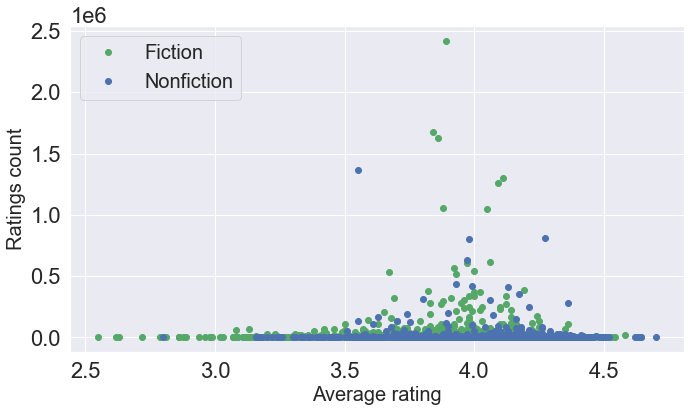

In [12]:
sns.set_context('notebook')
sns.set(font_scale = 2)
plt.figure(figsize=(11,6))
plt.plot(good_read_book[good_read_book['genre'] == 'Fiction'].average_rating, good_read_book[good_read_book['genre'] == 'Fiction'].ratings_count, "go", label='Fiction')
plt.plot(good_read_book[good_read_book['genre'] == 'Nonfiction'].average_rating, good_read_book[good_read_book['genre'] == 'Nonfiction'].ratings_count, "bo", label='Nonfiction')
plt.xlabel("Average rating", fontsize=20)
plt.ylabel("Ratings count", fontsize=20)
plt.legend(fontsize=20, loc='upper left')
plt.show()

# Who wrote the fictional book most

In [13]:
fiction_author = good_read_book[good_read_book['genre'] == 'Fiction'].authors
fiction_author = fiction_author.to_list()

for i in range(len(fiction_author)):
    if '/' in fiction_author[i]:
        k = fiction_author[i].split('/')
        del fiction_author[i]
        for j in range(1,len(k)):
            fiction_author.append(k[j])

fiction_author = pd.Series(fiction_author)
fiction_author_top15 = fiction_author.value_counts()[:15]
fiction_author_top15

P.G. Wodehouse            36
Philip Roth               16
Tom Clancy                16
Maeve Binchy              15
Jodi Picoult              14
John Grisham              14
Toni Morrison             13
Dan Brown                 12
Joyce Carol Oates         11
John Irving               11
Clive Cussler             10
Thomas Pynchon            10
Don DeLillo               10
Gabriel García Márquez    10
Kurt Vonnegut Jr.         10
dtype: int64

C:\Users\Wei\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


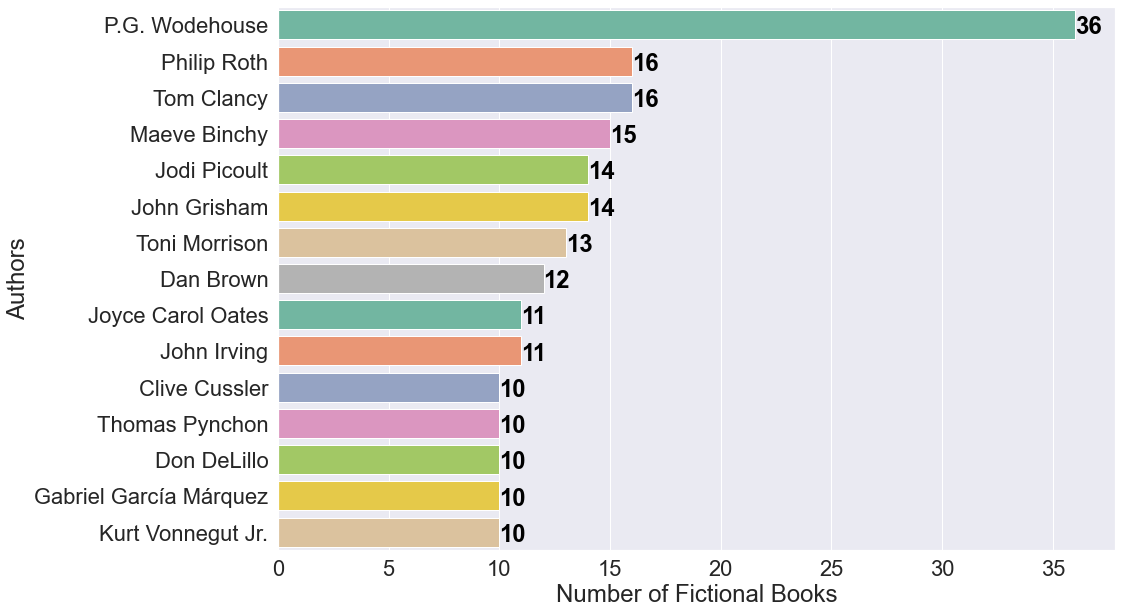

In [27]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.barplot(fiction_author_top15.values, fiction_author_top15.keys(), palette='Set2')
ax.set(xlabel = "Number of Fictional Books", ylabel = "Authors")
for i, v in enumerate(fiction_author_top15):
    ax.text(v, i + .25, str(v), color='black', fontweight='bold')
plt.show()

# Who wrote the nonfictional book most

In [15]:
nonfiction_author = good_read_book[good_read_book['genre'] == 'Nonfiction'].authors
nonfiction_author = nonfiction_author.to_list()

for i in range(len(nonfiction_author)):
    if '/' in nonfiction_author[i]:
        k = nonfiction_author[i].split('/')
        del nonfiction_author[i]
        for j in range(1,len(k)):
            nonfiction_author.append(k[j])

nonfiction_author = pd.Series(nonfiction_author)
nonfiction_author_top15 = nonfiction_author.value_counts()[:15]
nonfiction_author_top15

Bill Bryson           12
John McPhee            8
Joan Didion            7
Gunther Stuhlmann      4
Douglas Coupland       4
Hunter S. Thompson     4
Erik Larson            4
Eric Schlosser         4
Amartya Sen            3
Barbara Ehrenreich     3
Annie Dillard          3
Malcolm Gladwell       3
Jonathan Harr          3
Anaïs Nin              3
Umberto Eco            3
dtype: int64

C:\Users\Wei\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


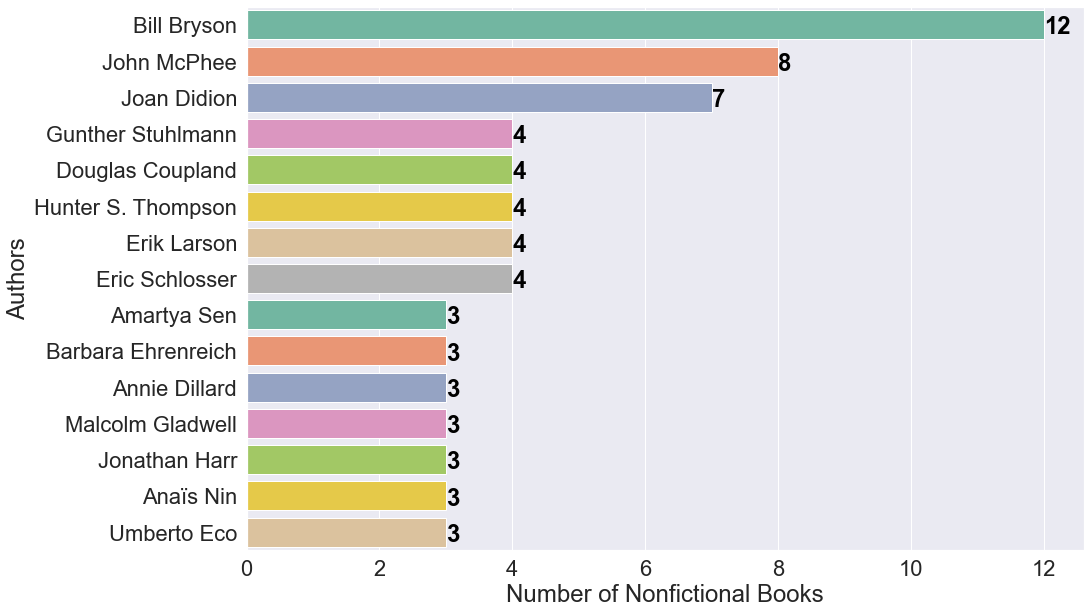

In [28]:
plt.figure(figsize=(15,10))
sns.set(font_scale = 2)
ax = sns.barplot(nonfiction_author_top15.values, nonfiction_author_top15.keys(), palette='Set2')
ax.set(xlabel = "Number of Nonfictional Books", ylabel = "Authors")
for i, v in enumerate(nonfiction_author_top15):
    ax.text(v, i + .25, str(v), color='black', fontweight='bold')
plt.show()

# NearestNeighbors

In [17]:
model_input = good_read_book[['average_rating', 'ratings_count', 'genre_to_num']]
model_input

,average_rating,ratings_count,genre_to_num
0,4.57,2095690,0
1,4.49,2153167,0
2,4.42,6333,0
3,4.56,2339585,0
4,4.78,41428,0
...,...,...,...
11118,4.06,156,9
11119,4.08,783,9
11120,3.96,820,10
11121,3.72,769,3


In [18]:
model = neighbors.NearestNeighbors(n_neighbors=20, algorithm='ball_tree')
model.fit(model_input)
distance, indices = model.kneighbors(model_input)

In [32]:
indices

array([[    0,  2114,    23, ...,   591,  2764,  5407],
       [    1,    23,  2114, ...,   591,  2764,  5407],
       [    2,  4638,  4181, ...,  6918,  7591,  3832],
       ...,
       [11120, 10939,  3177, ...,   548,  3184,  9190],
       [11121,  3588,  3335, ...,  4307, 11085,  3254],
       [11122, 10972,  8194, ...,  8457,   487,  8561]], dtype=int64)

In [19]:
def get_index_from_name(name):
    return good_read_book[good_read_book["title"]==name].index.tolist()[0]

all_books_names = list(good_read_book.title.values)
                    
def print_similar_books(query=None):
    if query:
        found_id = get_index_from_name(query)
        query_genre = good_read_book.iloc[found_id]["genre"]
        similar_books = indices[found_id][1:]
        remove = []
        books = []
        for id in range(len(similar_books)):
            if query_genre == good_read_book.iloc[similar_books[id]]["genre"]:
                books.append(good_read_book.iloc[similar_books[id]]["title"])
                remove.append(id)
            if(len(books) == 5):
                for i in range(5):
                    print(books[i])
                return
        similar_books = np.delete(similar_books, remove)
        for id in similar_books:
            books.append(good_read_book.iloc[id]["title"])
            if(len(books) == 5):
                for i in range(5):
                    print(books[i])
                return


In [20]:
# Genre is fantasy
print_similar_books('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')

Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
The Lightning Thief (Percy Jackson and the Olympians  #1)
The Hobbit  or There and Back Again


In [21]:
# Genre is education                            
print_similar_books('Getting Results with Curriculum Mapping')

Science Notebooks: Writing about Inquiry
The Facilitator's Book of Questions: Tools for Looking Together at Student and Teacher Work
The Wonder Years: Helping Your Baby and Young Child Successfully Negotiate the Major Developmental Milestones
A World of Art
Leonardo da Vinci: Obra pictorica completa y obra grafica


In [22]:
# Genre is fiction
print_similar_books('Expelled from Eden: A William T. Vollmann Reader')

El nombre de la rosa
Tim
Exile
O Xará
L'Équilibre du monde
